<a href="https://colab.research.google.com/github/peisuke/ml-works/blob/main/4/4_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 4.2 分類の評価の実験
- 目的
    - 分類を行った際の流れと結果を確認する
- 参考
    - 本コードは以下のサイトを参考にしました
    - https://www.codexa.net/ml-evaluation-cls/

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
%matplotlib inline

In [2]:
# データのダウンロード
cancer = load_breast_cancer()
X = pd.DataFrame(cancer.data, columns=cancer.feature_names)
y = cancer.target

# 数値や特徴量の確認
display(X.head())

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
#特徴量とターゲットを、訓練データとテストデータに分割
from sklearn.model_selection import train_test_split

In [4]:
# 学習データとテストデータに分割
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.5)

In [5]:
#ロジスティック回帰モデルで学習
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=1000, random_state=0)
lr.fit(X_train,Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression(max_iter=1000, random_state=0)

In [6]:
#モデルからYの値を予測して出力
Y_pred = lr.predict(X_test)

In [7]:
# 最初の5個のデータについて正解と予測を表示
print('正解: ', Y_test[:5])
print('予測: ', Y_pred[:5])

正解:  [1 0 1 1 1]
予測:  [1 0 1 1 1]


In [8]:
#混同行列、正解率、適合率、再現率、F値を表示
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score,recall_score,f1_score
print('confusion matrix = \n', confusion_matrix(y_true = Y_test, y_pred = Y_pred))
print('accuracy = ',accuracy_score(y_true = Y_test , y_pred = Y_pred))
print('precision = ',precision_score(y_true = Y_test , y_pred = Y_pred))
print('recall = ',recall_score(y_true = Y_test , y_pred = Y_pred))
print('f1 score = ',f1_score(y_true = Y_test , y_pred = Y_pred))

confusion matrix = 
 [[ 93   8]
 [  5 179]]
accuracy =  0.9543859649122807
precision =  0.9572192513368984
recall =  0.9728260869565217
f1 score =  0.9649595687331537


In [9]:
from sklearn.metrics import roc_curve, precision_recall_curve, auc

#テストデータがクラス1に属する確率を予測し、その確率からFPR、TPR、閾値を計算
Y_score = lr.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_true=Y_test,y_score=Y_score)

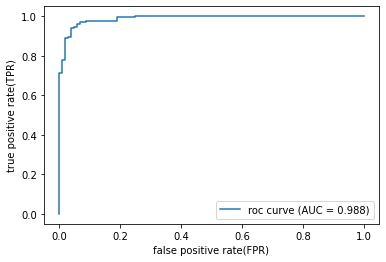

In [10]:
#ROC曲線を描き、AUCを算出
plt.plot(fpr,tpr,label='roc curve (AUC = %0.3f)' % auc(fpr,tpr))
plt.legend()
plt.xlabel('false positive rate(FPR)')
plt.ylabel('true positive rate(TPR)')
plt.show()